In [31]:
import pandas as pd
import numpy as np

In [56]:
rdata = pd.read_json("Complied_data.json", orient="split")

In [58]:
rdata["len"] = rdata["Title"].str.len()
rdata["upvote"] = rdata["Late Upvotes"]
rdata["lupvote"] = np.log(rdata["upvote"] + 2)
data = rdata

In [59]:
data.head()

,Title,Early Upvotes,Comments,Late Upvotes,Tags,Timestamp,len,upvote,lupvote
0,"Alright east coasters, why are you browsing Re...",1,19,7,None,2019-01-01 05:00:00,87,7,2.197225
1,"Fellow Redditors, Why are you on Reddit right ...",1,39,4,None,2019-01-01 05:00:00,84,4,1.791759
2,How was your experience after dropping frat bu...,1,1,1,None,2019-01-01 05:00:00,79,1,1.098612
3,My mother always said that what you're doing w...,1,1,1,None,2019-01-01 05:00:00,144,1,1.098612
4,What's the best thing the reddit community has...,1,4,3,None,2019-01-01 05:00:00,52,3,1.609438


In [73]:
tdata = rdata.groupby("Timestamp").mean()
tdata["c"] = rdata.groupby("Timestamp").count()["Title"]

In [74]:
tdata

,Early Upvotes,Comments,Late Upvotes,len,upvote,lupvote,c
Timestamp,,,,,,,
2019-01-01 05:00:00,1.000,14.793,11.608,70.905,11.608,1.279988,1000
2019-01-01 09:00:00,1.000,39.440,76.240,71.449,76.240,1.367478,1000
2019-01-01 13:00:00,1.000,20.543,15.057,74.967,15.057,1.364746,1000
2019-01-01 17:00:00,1.000,10.604,5.819,76.245,5.819,1.307206,1000
2019-01-01 21:00:00,1.000,17.298,225.868,75.210,225.868,1.365645,1000
...,...,...,...,...,...,...,...
2019-12-30 05:00:00,1.001,14.848,28.771,74.616,28.771,1.370907,1000
2019-12-30 09:00:00,1.000,8.860,2.937,76.056,2.937,1.382140,1000
2019-12-30 13:00:00,1.000,8.167,3.021,78.019,3.021,1.352702,1000


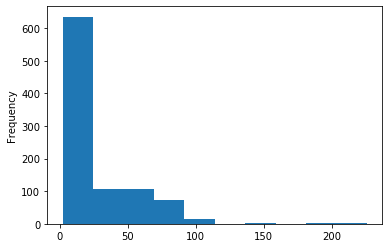

In [87]:
tdata.sort_values("upvote")["upvote"].plot.hist()

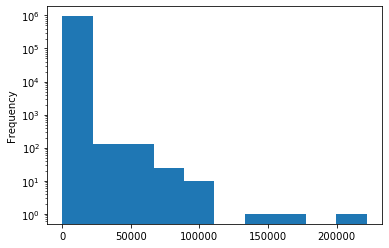

In [18]:
data["upvote"].plot.hist(log=True)

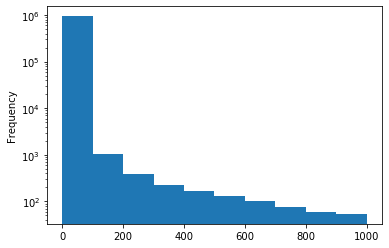

In [19]:
data["upvote"].plot.hist(range=(0, 1000), log=True)

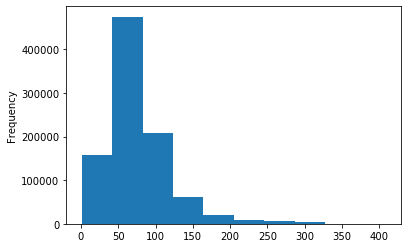

In [24]:
data["len"].plot.hist()

C:\Users\Jasper\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


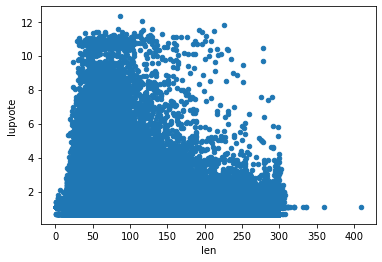

In [52]:
data.plot.scatter(x="len", y="lupvote")

In [53]:
gdata = data[data["upvote"] > 100]

In [41]:
gdata.head()

,Title,Early Upvotes,Comments,Late Upvotes,Tags,Timestamp,len,upvote,lupvote
319,What minor thing that happened to you as a chi...,1,4312,7295,None,2019-01-01 05:00:00,85,7295,8.895082
341,"If you became the opposite sex, what do you th...",1,1026,602,None,2019-01-01 05:00:00,86,602,6.401917
470,What do you think is the most beautiful thing ...,1,793,796,None,2019-01-01 05:00:00,60,796,6.680855
783,people still shooting guns and fireworks at 1 ...,1,181,734,None,2019-01-01 05:00:00,86,734,6.599870
11,Do you scrub your butt in the shower?,1,452,345,None,2019-01-01 09:00:00,37,345,5.846439


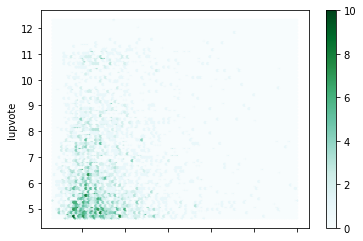

In [54]:
gdata.plot.hexbin(x="len",y="lupvote")

In [43]:
from pandas.plotting import bootstrap_plot

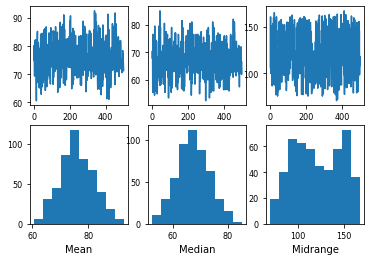

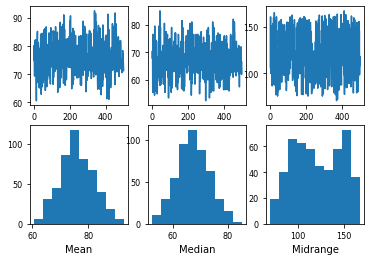

In [47]:
bootstrap_plot(data["len"])

In [50]:
data.describe()

,Comments,len,upvote,lupvote
count,943995.000000,943995.000000,943995.000000,943995.000000
mean,16.764493,76.230366,23.863328,1.026492
std,339.575263,42.980885,978.852830,0.696839
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,48.000000,1.000000,0.693147
50%,4.000000,67.000000,1.000000,0.693147
75%,10.000000,93.000000,3.000000,1.386294
max,76091.000000,409.000000,221855.000000,12.309784


In [49]:
data = data[["Comments", "len", "upvote", "lupvote"]]

In [76]:
data

,Title,Early Upvotes,Comments,Late Upvotes,Tags,Timestamp,len,upvote,lupvote
0,"Alright east coasters, why are you browsing Re...",1,19,7,None,2019-01-01 05:00:00,87,7,2.197225
1,"Fellow Redditors, Why are you on Reddit right ...",1,39,4,None,2019-01-01 05:00:00,84,4,1.791759
2,How was your experience after dropping frat bu...,1,1,1,None,2019-01-01 05:00:00,79,1,1.098612
3,My mother always said that what you're doing w...,1,1,1,None,2019-01-01 05:00:00,144,1,1.098612
4,What's the best thing the reddit community has...,1,4,3,None,2019-01-01 05:00:00,52,3,1.609438
...,...,...,...,...,...,...,...,...,...
995,Serious Response,1,1,1,None,2019-12-30 21:00:00,16,1,1.098612
996,I did the right thing?,1,1,1,None,2019-12-30 21:00:00,22,1,1.098612
997,What’s some of the extreme measures you have g...,1,1,1,None,2019-12-30 21:00:00,68,1,1.098612
998,What's an ugly celebrity you would sleep with?,1,4,0,None,2019-12-30 21:00:00,46,0,0.693147


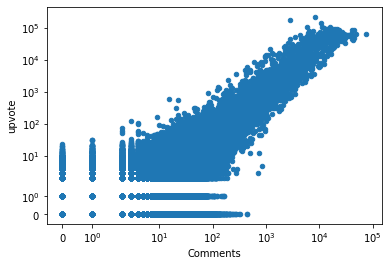

In [84]:
data.plot.scatter(x="Comments", y="upvote", logx="sym", logy="sym")